<a href="https://colab.research.google.com/github/jayuan101/Airline_Predication/blob/main/Flights_Netural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #split data
from sklearn import preprocessing
from tensorflow import keras 
from tensorflow.keras import models, layers, utils, backend as K
from keras.models import Sequential 
from keras.layers import Dense #layers
from keras.utils import np_utils
import keras
import datetime #datettme library
import math #math library
from keras.layers import Dropout #layers
from keras.layers import Flatten #layers
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_flight = pd.read_csv('/content/flight_data.csv')

In [3]:
df_flight

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00


In [4]:
#call shape to identify the rows and columns of the dataset
print('Flights dataset is having ',df_flight.shape[0] , 'rows and ',df_flight.shape[1],' columns which is big enough for an excel file to handle/process sometimes')

Flights dataset is having  336776 rows and  19  columns which is big enough for an excel file to handle/process sometimes


In [5]:
'''
Function draw_barplot is a function to draw bar plots for visual analysis 

#_style = variable for seaborn style
#_x = X Axis variable
#_y = Y Axis variable
#_dataset= dataset variable
#_suptitle = Subtitle Text to be displayed
#_xLabels = Labels to be displayed for x axis 
#_yLabels = Labels to be displayed for y axis 

'''
        
def draw_barplot(_style, _x,_y,_dataset,_suptitle,_xLabels,_yLabels):        
            sns.set(style=_style)         
            g = sns.catplot(x=_x, y=_y, data=_dataset,aspect=2,
                            height=5, kind="bar", palette="muted")
            plt.subplots_adjust(top=0.9)
            g.fig.suptitle(_suptitle)
            g.set_xlabels(_xLabels)
            g.set_ylabels(_yLabels)    

In [6]:
'''
Function plot_CountPlot is a function to draw Count plots for visual analysis 

'''

def plot_CountPlot(X,Dataframe,Title):
    fig = plt.figure(figsize=(15,5))
    ax = sns.countplot(x=X, data=Dataframe ,palette='pastel' ,edgecolor=sns.color_palette("dark", 3))
    ax.set_title(Title)
    ax.legend(loc='upper right')

    for t in ax.patches:
        if (np.isnan(float(t.get_height()))):
            ax.annotate(0, (t.get_x(), 0))
        else:
            ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    plt.show();  

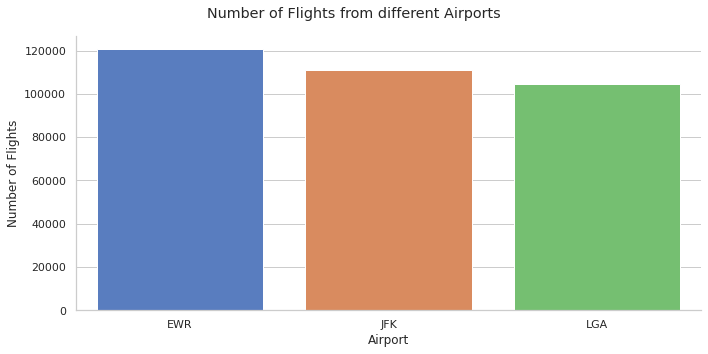

In [7]:
dt=df_flight.groupby(by='origin').count().reset_index().sort_values(by='year', ascending=False)
dt['flightsCount']=dt.year

#Call Function to draw Bar Graph
draw_barplot(_style='whitegrid',_x='origin',_y='flightsCount',_xLabels='Airport',
             _yLabels='Number of Flights', _dataset=dt,
             _suptitle="Number of Flights from different Airports"
            )

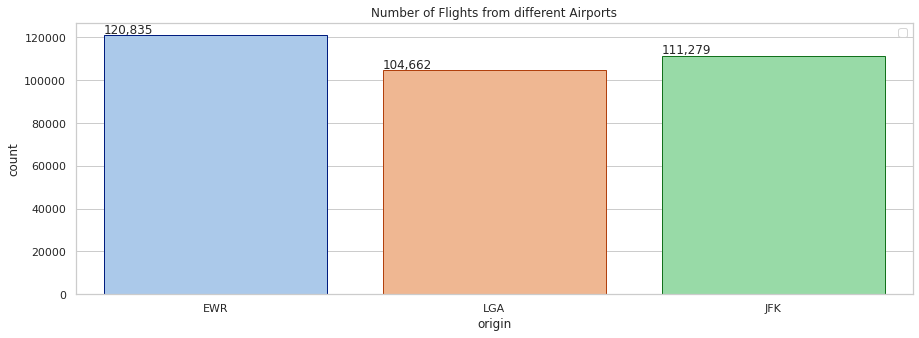

In [8]:
plot_CountPlot('origin',df_flight,'Number of Flights from different Airports')

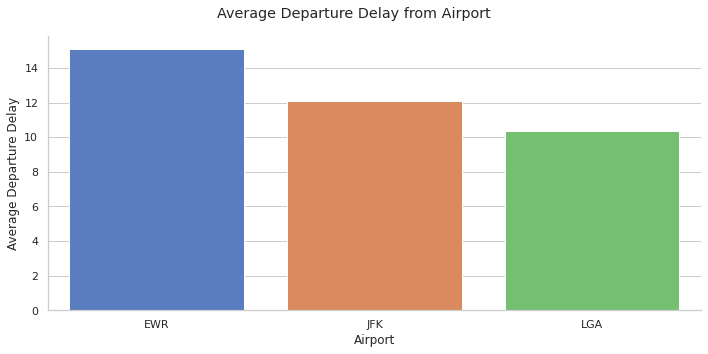

In [9]:
delay_Frame=df_flight.groupby(by='origin').mean().reset_index().sort_values(by='year', ascending=False)
dt[['origin','dep_delay']]

#Call Function to draw Bar Graph
draw_barplot(_style='whitegrid',_x='origin',_y='dep_delay',_xLabels='Airport',
             _yLabels='Average Departure Delay', _dataset=delay_Frame,
             _suptitle="Average Departure Delay from Airport"
            )

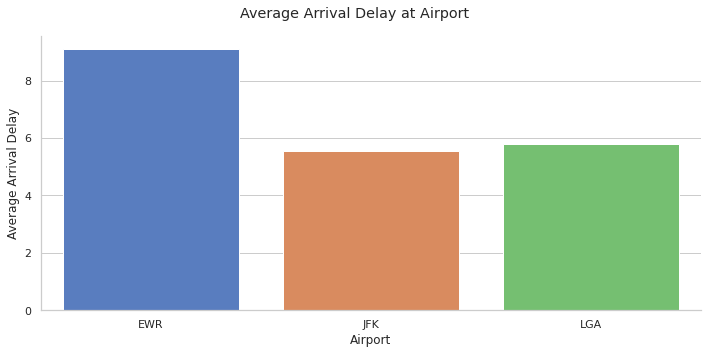

In [10]:
delay_Frame=df_flight.groupby(by='origin').mean().reset_index().sort_values(by='year', ascending=False)
dt[['origin','arr_delay']]

#Call Function to draw Bar Graph
draw_barplot(_style='whitegrid',_x='origin',_y='arr_delay',_xLabels='Airport',
             _yLabels='Average Arrival Delay', _dataset=delay_Frame,
             _suptitle="Average Arrival Delay at Airport"
            )

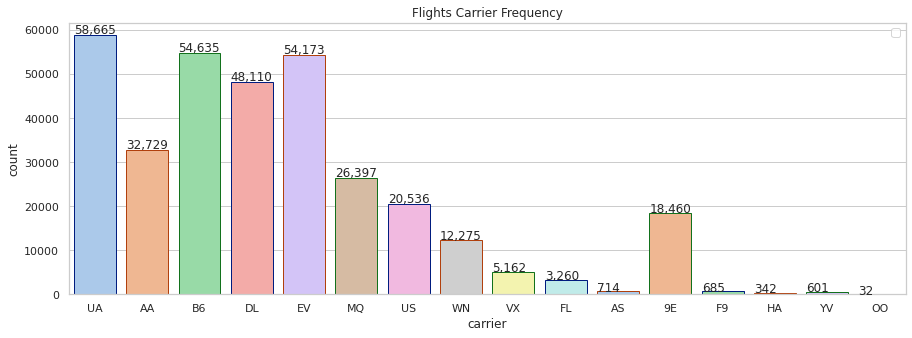

In [11]:
plot_CountPlot('carrier',df_flight,'Flights Carrier Frequency')

In [12]:
destflightcountdf=df_flight.groupby(["dest"],sort=True).count()
destflightcountdf['FlightsCount']=destflightcountdf['dep_delay']
destflightcountdf=destflightcountdf['FlightsCount'].sort_values(ascending=False).head(5)
destflightcountdf

dest
ATL    16898
ORD    16642
LAX    16076
BOS    15049
MCO    13982
Name: FlightsCount, dtype: int64

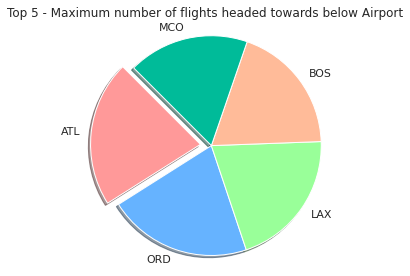

In [13]:
# Pie chart
labels = destflightcountdf.index
sizes = destflightcountdf.values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0, 0, 0,0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffbb99','#00bb99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, 
        shadow=True, startangle=135)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Top 5 - Maximum number of flights headed towards below Airport')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Origin Airports')

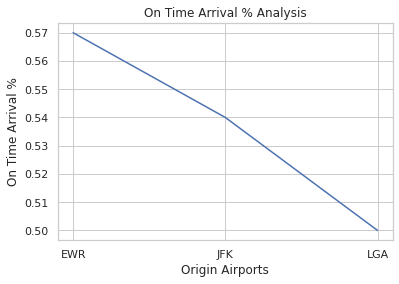

In [14]:
ota=(df_flight[df_flight["arr_delay"]==0].groupby("origin").count()).loc[:,"year":"month"]
OnTimeArrivalPerc=np.round(((ota["year"]/ df_flight["month"].count() ) * 100),decimals=2)

plt.plot(OnTimeArrivalPerc)
plt.title("On Time Arrival % Analysis")
plt.ylabel("On Time Arrival %")
plt.xlabel("Origin Airports")

In [15]:
# Number of scheduled departures planned by carriers in 2013

carrier_count = df_flight['carrier'].value_counts()
carrier_count

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

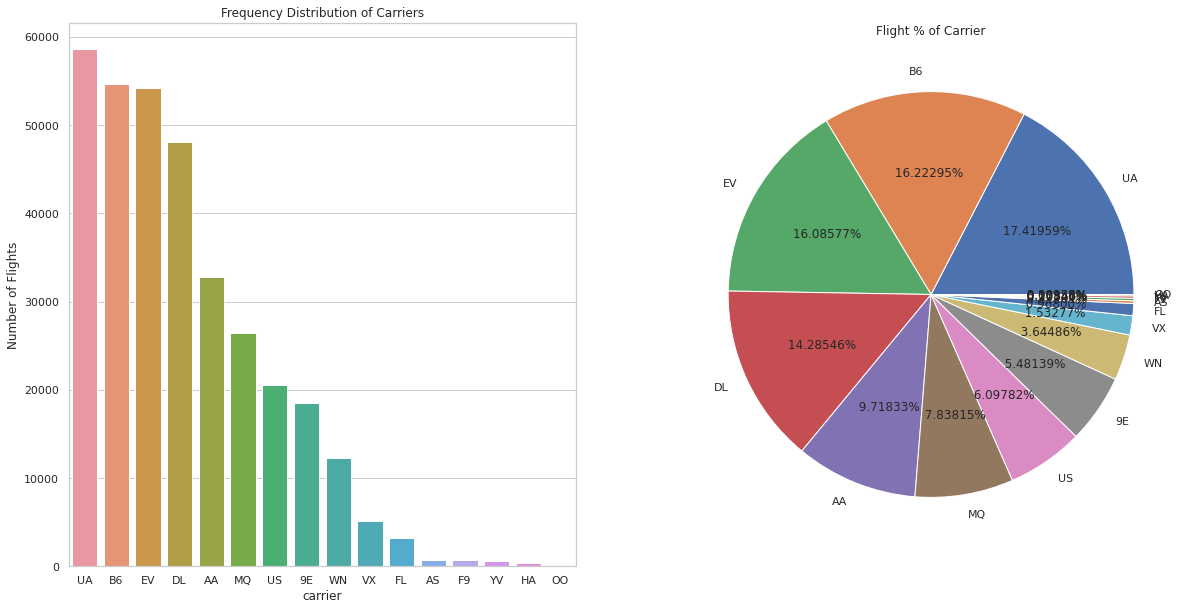

In [16]:
#Graphical representation of carriers scheduled flights in numbers and %

f,ax=plt.subplots(1,2,figsize=(20,10))
df_flight['carrier'].value_counts().plot.pie(autopct='%9.5f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('carrier',order = df_flight['carrier'].value_counts().index, data=df_flight,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

The top_10 destination flight from NYC are


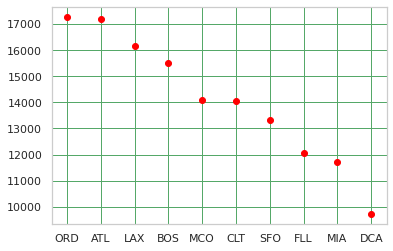

,dest,month
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


In [17]:
#Top10 destination flight from NYC 

dest_count=df_flight.groupby(['dest'],as_index=False).agg({'month':'count'})
max_dest_count=dest_count.sort_values(['month'], ascending=False)
print("The top_10 destination flight from NYC are")
top_dest_flight = max_dest_count.head(10)
plt.scatter(top_dest_flight.dest,top_dest_flight.month, color='red')
plt.legend
plt.grid(True, color='g', linewidth=1)
plt.show()
top_dest_flight

In [18]:
#Total number of unique Airline headed to MCO from NYC

MCO_dest=df_flight[df_flight['dest']=='BOS']
Carrier_count=(MCO_dest['carrier']).unique()

print("Carrier fly to MCO", Carrier_count)
print('\n')

print("Total number of Carrier  headed to 'MCO' from NYC is",len(Carrier_count))
print('\n')

MCO_dest_count=MCO_dest['tailnum'].unique()
print("Total unique aircraft  headed to 'MCO' from NYC is",len(MCO_dest_count))
print('\n')

Carrier fly to MCO ['B6' 'AA' 'DL' 'UA' 'US' '9E' 'EV']


Total number of Carrier  headed to 'MCO' from NYC is 7


Total unique aircraft  headed to 'MCO' from NYC is 1308




In [19]:
# Copy of Flight_data after dropping null values
flt_data_copy= df_flight.dropna()
flt_data_copy.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [20]:
# Avg. Monthly Departure Delay for Carrier

Monthly_Avg_Delay= flt_data_copy.groupby(['carrier','year'], axis=0, as_index=True).agg({'dep_delay':'mean'})
Monthly_Avg_Delay.head(15)

,,dep_delay
carrier,year,
9E,2013,16.439574
AA,2013,8.569130
AS,2013,5.830748
B6,2013,12.967548
DL,2013,9.223950
EV,2013,19.838929
F9,2013,20.201175
FL,2013,18.605984
HA,2013,4.900585


In [21]:
# Copy of Flight_data after dropping null values
flt_data_copy= df_flight.dropna()
flt_data_copy.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [22]:
#Avg_arr_delay_sort by Carrier in 2013 (inclusive early arrival)

flt_data_copy.groupby('carrier').agg(np.size)                 
top_delay = flt_data_copy.groupby('carrier').agg({'arr_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay.sort_values([('arr_delay', 'mean')], ascending=False).head(16)

arr_delay           
             size       mean
carrier                     
F9            681  21.920705
FL           3175  20.115906
EV          51108  15.796431
YV            544  15.556985
OO             29  11.931034
MQ          25037  10.774733
WN          12044   9.649120
B6          54049   9.457973
9E          17294   7.379669
UA          57782   3.558011
US          19831   2.129595
VX           5116   1.764464
DL          47658   1.644341
AA          31947   0.364291
HA            342  -6.915205
AS            709  -9.930889

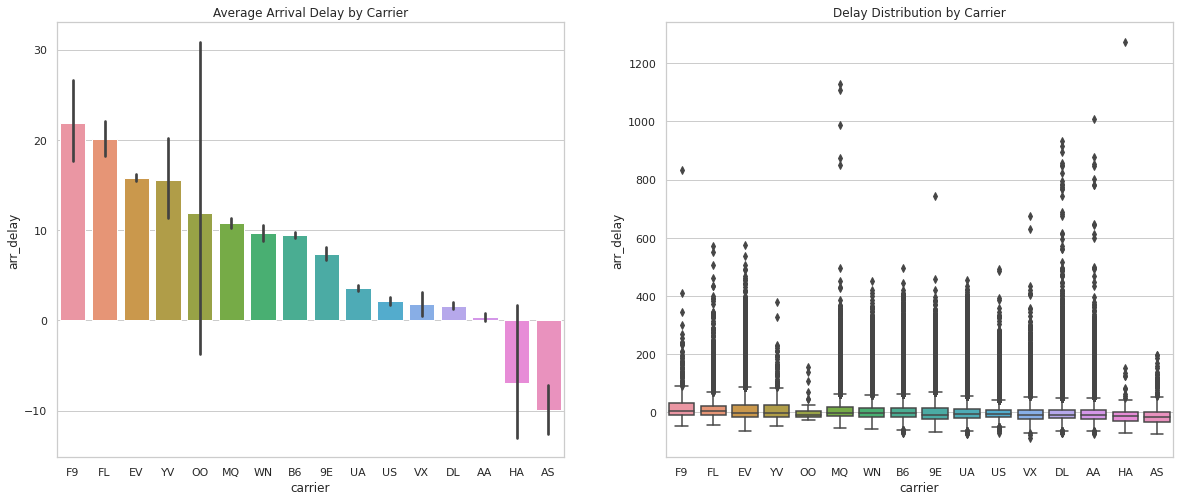

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']


In [23]:
#Average arrival delay by carrier in 2013   (inclusive early arrival)

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=flt_data_copy,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
                                                                                 
ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=flt_data_copy,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])

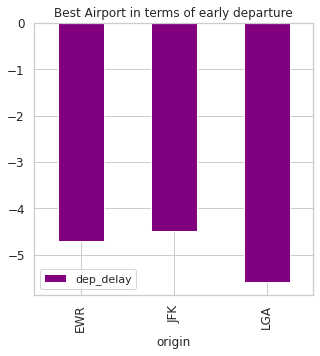

In [24]:
# Best airport in terms of early departure from NYC

airport_info = pd.DataFrame(flt_data_copy,columns=['day','month','dep_delay','arr_delay','carrier','origin','dest','flight'])
airport_origin = airport_info[airport_info['dep_delay']<0]
best_airport = airport_origin.sort_values(['dep_delay']).groupby(['origin']).agg({'dep_delay':'mean'})
best_airport.plot(kind='bar',color='purple', title ="Best Airport in terms of early departure",figsize=(5,5),legend=True, fontsize=12)
plt.show()
plt.close()

In [25]:
X = np.random.rand(1000,10)
y = np.random.choice([1,0], size=1000)

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [27]:
import shap

In [28]:
model = models.Sequential(name="Perceptron", layers=[
    layers.Dense(             #a fully connected layer
          name="dense",
          input_dim=3,        #with 3 features as the input
          units=1,            #and 1 node because we want 1 output
          activation='linear' #f(x)=x
    )
])
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [29]:
# define the function
import tensorflow as tf
def binary_step_activation(x):
    ##return 1 if x>0 else 0 
    return K.switch(x>0, tf.math.divide(x,x), tf.math.multiply(x,0))

# build the model
model = models.Sequential(name="Perceptron", layers=[
      layers.Dense(             
          name="dense",
          input_dim=3,        
          units=1,            
          activation=binary_step_activation
      )
])

In [30]:
n_features = 19
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
  
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                200       
                                                                 
 drop1 (Dropout)             (None, 10)                0         
                                                                 
 h2 (Dense)                  (None, 5)                 55        
                                                                 
 drop2 (Dropout)             (None, 5)                 0         
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Perceptron
inputs = layers.Input(name="input", shape=(3,))
outputs = layers.Dense(name="output", units=1, 
                       activation='linear')(inputs)
model = models.Model(inputs=inputs, outputs=outputs, 
                     name="Perceptron")

# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
### layer output
outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")

In [32]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

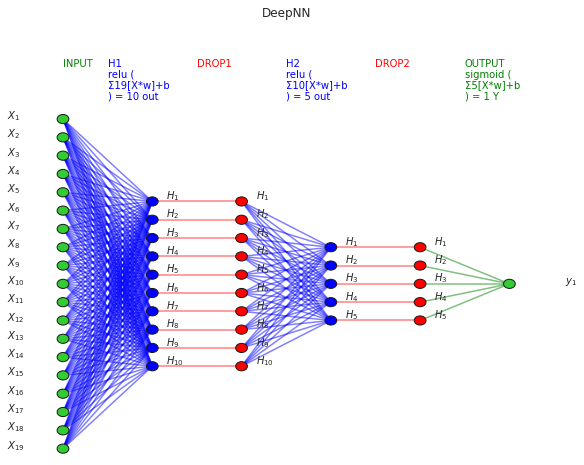

In [33]:
visualize_nn(model, description=True, figsize=(10,8))

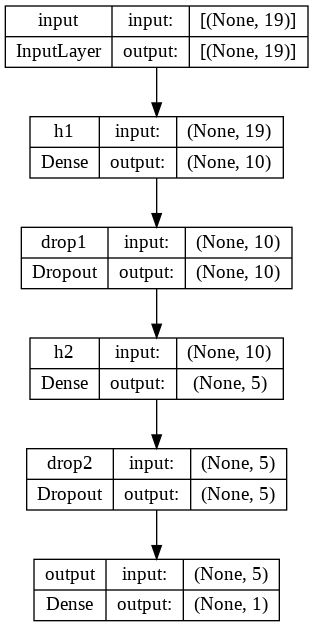

In [34]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [35]:
import os
os.remove('model.png')

In [36]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy_score',F1])

In [37]:
# define metrics
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error', 
              metrics=[R2])

In [54]:
from sklearn.metrics import accuracy_score
print(Recall)
print(Precision)
print(accuracy_score)
print(R2)
print(F1)

<function Recall at 0x7f155db32200>
<function Precision at 0x7f155db32320>
<function accuracy_score at 0x7f164090c830>
<function R2 at 0x7f155db74440>
<function F1 at 0x7f155db32440>
